This notebook aims to group the download of data coming from https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=form .

# Packages, functions and paths

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_35444\1754114704.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


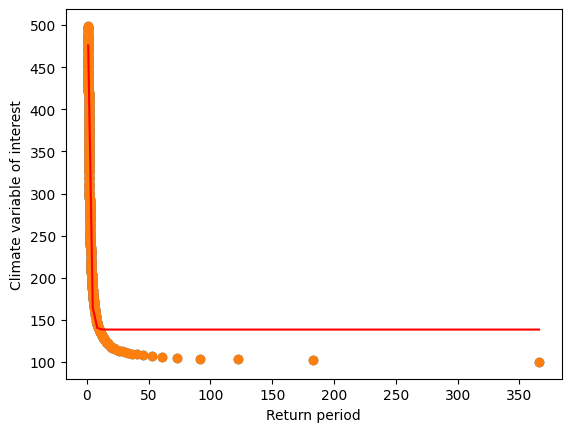

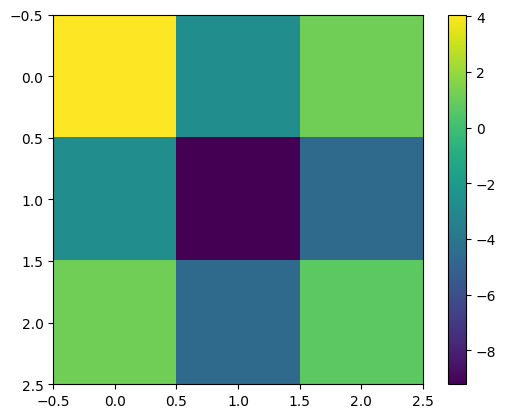

In [1]:
import geopandas as gpd
import os
import os.path
from netCDF4 import Dataset
import numpy as np

from FileManagement import download_extract
from FileManagement import path_length
from FunctionsAndClass import search_for_nc

In [2]:
#project locations (shapefile with location of elements to evaluate)
data_folder=r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets'
#data_folder=os.path.join(os.pardir,'dataset')
project_location_path=os.path.join(data_folder,'Mozambique_PPIS/EIB_locations_few.shp')
project_id='Name' #name of column used as id

#study boundary (optional)
study_area_path=os.path.join(data_folder,'Mozambique_PPIS/mozambique.shp')

#output folder
#out_path=r'\\COWI.net\projects\A245000\A248363\CRVA\Scripts\outputs'
out_path=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs'
out_path_database=r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets'
#projection CRS (default = 'EPSG:4326')
bCRS='EPSG:4326'

#buffer for climate/grid variables
buffer=40000 #buffer in meters, 0 = no buffer is computed

mCRS='EPSG:31983' #metric CRS for buffer in meters (find relevant metric CRS for location!)

# User input
Only the part of interest for the user will be downloaded.

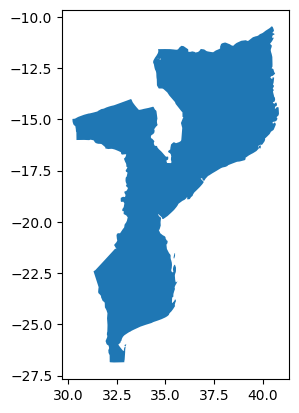

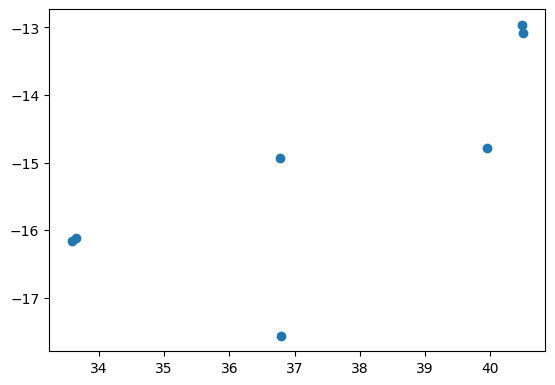

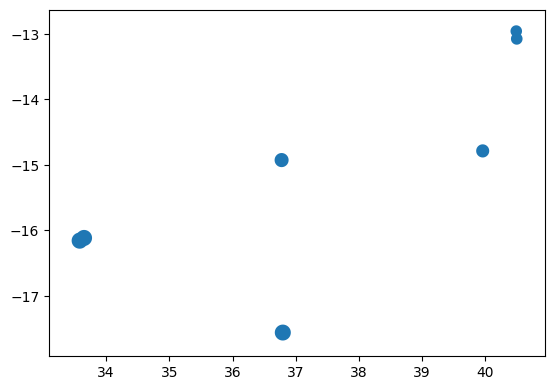

In [3]:
#load shapefiles
projects = gpd.read_file(project_location_path).to_crs(bCRS)
study_area = gpd.read_file(study_area_path).to_crs(bCRS)

#calculate buffer around points/shape
if buffer != 0:
    projects_buf=projects.to_crs(mCRS)  #project to crs with metric units to get buffer in meters
    projects_buf['geometry']=projects.to_crs(mCRS).buffer(buffer) #assign the buffer as the new geometry - 
    projects_buf=projects_buf.to_crs(bCRS)#project back to orginal crs

    
#plot shapefiles
study_area.plot()
projects.plot()
projects_buf.plot() 


#show table
projects[[project_id]]

# register geographic information concerning projects
lon_projects = projects['geometry'].x
lat_projects = projects['geometry'].y
buffer_project = 0.1
area_projects = [lat_projects - buffer_project, lat_projects+buffer_project, lon_projects-buffer_project,lon_projects+buffer_project] # list format

#### determination of the geographical zone of interest 
lat_min_wanted = min(study_area['LAT'])-10
lat_max_wanted = max(study_area['LAT'])+10
lon_min_wanted = min(study_area['LON'])-20
lon_max_wanted = max(study_area['LON'])+20
# addind and substracting to lon and lat to have margin
# substracting more to longitude because the range of longitude is -180 to 180. The range of latitude is -90 to 90

area = [lat_min_wanted, lon_min_wanted, lat_max_wanted,lon_max_wanted,] # used to download from copernicus

In [4]:
area_projects[1][0]

-16.0180719828059

In [ ]:
projects['Name'][0]

# Precipitation

In [ ]:
name_variable = 'precipitation' # only available on a monthly basis

### Historical data

### Projections

# Temperature

Need the maximum monthly near-surface temperature to compare to CRU data for downscaling
!!!! NEED TO CONVERT !!!! Need to sustract 273.15 to have data in degrees celsius, not in K anymore

In [ ]:
name_variable = 'daily_maximum_near_surface_air_temperature'
temporal_resolution = 'monthly'

### Historical : from 1950 to 2014

In [ ]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\temperature\Copernicus-CMIP6'

In [ ]:
# download only for one model first

model = 'ec_earth3_cc'
name_project = projects['Name'][0]
name_project = name_project.replace('/','')
name_project = name_project.replace(' ','')

path_file = os.path.join(out_path, name_variable,name_project,'historical-1950-2014', temporal_resolution)
path_file_download = os.path.join(path_file,'download.zip')
path_file=path_length(path_file)
path_file_download=path_length(path_file_download)

import cdsapi

c = cdsapi.Client()

c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'variable': 'daily_maximum_near_surface_air_temperature',
        'temporal_resolution': 'monthly',
        'experiment': 'historical',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'year': [
            '1950', '1951',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1960',
            '1961', '1962', '1963',
            '1964', '1965', '1966',
            '1967', '1968', '1969',
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
        ],
        'model': model,
        'area': [
            area_projects[0][0], area_projects[1][0], area_projects[2][0],
            area_projects[3][0],
        ],
    },
    path_file_download)

download_extract(path_file,path_file_download)
os.remove(path_file_download)

In [ ]:
path_file

In [ ]:
os.path.isdir(path_file)

In [ ]:
final_path=search_for_nc(path_file)

In [ ]:
df=Dataset(final_path)
height=np.ma.getdata(df.variables['height']).data # equal 2 m
tasmax=np.ma.getdata(df.variables['tasmax']).data

In [ ]:
tasmax - 273.15

In [ ]:
np.ma.getdata(df.variables['lat_bnds']).data

In [ ]:
df.variables

In [5]:
path_data = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\temperature\Copernicus-CMIP6\daily_maximum_near_surface_air_temperature\PT_Revubue2(Rev201)\historical-1950-2014\monthly\download\tasmax_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_19500116-20141216_v20210113.nc'

In [17]:
Dataset(path_data).variables#['tasmax']._FillValue # units are K

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     bounds: time_bnds
     axis: T
     long_name: time
     standard_name: time
     units: days since 1850-01-01
     calendar: proleptic_gregorian
 unlimited dimensions: 
 current shape = (780,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: 
 current shape = (780, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     bounds: lat_bnds
     units: degrees_north
     axis: Y
     long_name: Latitude
     standard_name: latitude
 unlimited dimensions: 
 current shape = (71,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 lat_bnds(time, lat, bnds)
 unlimited dimensions: 
 current shape = (780, 71, 2)
 filling on, default _FillValue of 9.969209968386869e+

In [8]:
from FileManagement import read_nc_file
(lat_train, lon_train, time_train, tasmax_train) = read_nc_file(path_data)
tasmax_train = tasmax_train -273.15 # convert tasmax from Kelvin to celsius degrees

In [6]:
from FileManagement import time_vector_conversion
time_str = time_vector_conversion(path_data,'monthly')

In [7]:
time_str

['1950-01',
 '1950-02',
 '1950-03',
 '1950-04',
 '1950-05',
 '1950-06',
 '1950-07',
 '1950-08',
 '1950-09',
 '1950-10',
 '1950-11',
 '1950-12',
 '1951-01',
 '1951-02',
 '1951-03',
 '1951-04',
 '1951-05',
 '1951-06',
 '1951-07',
 '1951-08',
 '1951-09',
 '1951-10',
 '1951-11',
 '1951-12',
 '1952-01',
 '1952-02',
 '1952-03',
 '1952-04',
 '1952-05',
 '1952-06',
 '1952-07',
 '1952-08',
 '1952-09',
 '1952-10',
 '1952-11',
 '1952-12',
 '1953-01',
 '1953-02',
 '1953-03',
 '1953-04',
 '1953-05',
 '1953-06',
 '1953-07',
 '1953-08',
 '1953-09',
 '1953-10',
 '1953-11',
 '1953-12',
 '1954-01',
 '1954-02',
 '1954-03',
 '1954-04',
 '1954-05',
 '1954-06',
 '1954-07',
 '1954-08',
 '1954-09',
 '1954-10',
 '1954-11',
 '1954-12',
 '1955-01',
 '1955-02',
 '1955-03',
 '1955-04',
 '1955-05',
 '1955-06',
 '1955-07',
 '1955-08',
 '1955-09',
 '1955-10',
 '1955-11',
 '1955-12',
 '1956-01',
 '1956-02',
 '1956-03',
 '1956-04',
 '1956-05',
 '1956-06',
 '1956-07',
 '1956-08',
 '1956-09',
 '1956-10',
 '1956-11',
 '19

In [12]:
len(time_str)

780

In [13]:
display(tasmax_train)

array([[[26.489502 , 26.424286 , 26.394043 , ..., 28.51706  ,
         29.09494  , 28.561188 ],
        [26.47931  , 26.436676 , 26.38858  , ..., 27.203674 ,
         27.260468 , 26.06607  ],
        [26.51889  , 26.45642  , 26.386597 , ..., 25.790955 ,
         25.673187 , 25.412262 ],
        ...,
        [16.490753 , 16.483978 , 16.458954 , ..., 15.535553 ,
         15.747589 , 16.039276 ],
        [16.165009 , 16.170929 , 16.154297 , ..., 14.918854 ,
         15.110474 , 15.359497 ],
        [15.9166565, 15.905518 , 15.920349 , ..., 14.659851 ,
         14.889252 , 14.968079 ]],

       [[27.397644 , 27.335907 , 27.328949 , ..., 27.968018 ,
         27.961334 , 27.463623 ],
        [27.347809 , 27.345093 , 27.332153 , ..., 26.935852 ,
         26.921692 , 25.642395 ],
        [27.350159 , 27.332916 , 27.294067 , ..., 25.67041  ,
         25.581238 , 25.157013 ],
        ...,
        [16.186676 , 16.251038 , 16.297089 , ..., 15.535034 ,
         15.783234 , 16.088348 ],
        [15.

In [32]:
import xarray as xr
data_structure_train = xr.DataArray(tasmax_train, coords=[time_str,lat_train,lon_train], dims=['time', 'lat','lon'])

In [34]:
data_structure_train

<xarray.DataArray (time: 780, lat: 71, lon: 71)>
array([[[26.489502 , 26.424286 , 26.394043 , ..., 28.51706  ,
         29.09494  , 28.561188 ],
        [26.47931  , 26.436676 , 26.38858  , ..., 27.203674 ,
         27.260468 , 26.06607  ],
        [26.51889  , 26.45642  , 26.386597 , ..., 25.790955 ,
         25.673187 , 25.412262 ],
        ...,
        [16.490753 , 16.483978 , 16.458954 , ..., 15.535553 ,
         15.747589 , 16.039276 ],
        [16.165009 , 16.170929 , 16.154297 , ..., 14.918854 ,
         15.110474 , 15.359497 ],
        [15.9166565, 15.905518 , 15.920349 , ..., 14.659851 ,
         14.889252 , 14.968079 ]],

       [[27.397644 , 27.335907 , 27.328949 , ..., 27.968018 ,
         27.961334 , 27.463623 ],
        [27.347809 , 27.345093 , 27.332153 , ..., 26.935852 ,
         26.921692 , 25.642395 ],
        [27.350159 , 27.332916 , 27.294067 , ..., 25.67041  ,
         25.581238 , 25.157013 ],
...
        [21.598663 , 21.649506 , 21.623627 , ..., 20.234192 ,
         20.523804 , 20.781067 ],
        [21.168457 , 21.241058 , 21.292725 , ..., 19.757812 ,
         20.01242  , 20.273407 ],
        [20.964905 , 20.979248 , 21.020569 , ..., 19.392792 ,
         19.697052 , 19.888641 ]],

       [[24.622253 , 24.506378 , 24.438995 , ..., 28.531036 ,
         29.270905 , 29.195984 ],
        [24.72284  , 24.667908 , 24.60913  , ..., 27.660889 ,
         28.272034 , 26.901245 ],
        [24.86441  , 24.796967 , 24.739807 , ..., 27.341309 ,
         27.091797 , 25.885498 ],
        ...,
        [19.051453 , 19.116882 , 19.092285 , ..., 17.887299 ,
         18.005768 , 18.300415 ],
        [18.587616 , 18.728241 , 18.792175 , ..., 17.397614 ,
         17.523468 , 17.706696 ],
        [18.374268 , 18.400177 , 18.459076 , ..., 17.147705 ,
         17.415527 , 17.499908 ]]], dtype=float32)
Coordinates:
  * time     (time) <U7 '1950-01' '1950-02' '1950-03' ... '2014-11' '2014-12'
  * lat      (lat) float64 -15.79 -15.09 -14.39 -13.68 ... 31.93 32.63 33.33
  * lon      (lon) float64 -15.47 -14.77 -14.06 -13.36 ... 32.34 33.05 33.75

In [37]:
# Select a year

data_structure_train.loc['1950-01':'1950-12',:,:]

<xarray.DataArray (time: 12, lat: 71, lon: 71)>
array([[[26.489502 , 26.424286 , 26.394043 , ..., 28.51706  ,
         29.09494  , 28.561188 ],
        [26.47931  , 26.436676 , 26.38858  , ..., 27.203674 ,
         27.260468 , 26.06607  ],
        [26.51889  , 26.45642  , 26.386597 , ..., 25.790955 ,
         25.673187 , 25.412262 ],
        ...,
        [16.490753 , 16.483978 , 16.458954 , ..., 15.535553 ,
         15.747589 , 16.039276 ],
        [16.165009 , 16.170929 , 16.154297 , ..., 14.918854 ,
         15.110474 , 15.359497 ],
        [15.9166565, 15.905518 , 15.920349 , ..., 14.659851 ,
         14.889252 , 14.968079 ]],

       [[27.397644 , 27.335907 , 27.328949 , ..., 27.968018 ,
         27.961334 , 27.463623 ],
        [27.347809 , 27.345093 , 27.332153 , ..., 26.935852 ,
         26.921692 , 25.642395 ],
        [27.350159 , 27.332916 , 27.294067 , ..., 25.67041  ,
         25.581238 , 25.157013 ],
...
        [20.037903 , 20.076965 , 20.08902  , ..., 19.104889 ,
         19.314087 , 19.680603 ],
        [19.75418  , 19.77362  , 19.792023 , ..., 18.495148 ,
         18.756775 , 19.104828 ],
        [19.571075 , 19.536987 , 19.540436 , ..., 18.03366  ,
         18.374756 , 18.572998 ]],

       [[23.179932 , 23.10022  , 23.034546 , ..., 28.32669  ,
         28.415314 , 28.126373 ],
        [23.304565 , 23.247223 , 23.169434 , ..., 27.227173 ,
         27.304596 , 26.197632 ],
        [23.513733 , 23.44696  , 23.360535 , ..., 26.3927   ,
         26.12793  , 25.365387 ],
        ...,
        [17.779999 , 17.936554 , 18.12445  , ..., 15.566437 ,
         15.733826 , 15.861938 ],
        [17.40033  , 17.519379 , 17.695648 , ..., 14.904083 ,
         15.044861 , 15.208832 ],
        [17.229614 , 17.244598 , 17.401367 , ..., 14.550476 ,
         14.744293 , 14.740021 ]]], dtype=float32)
Coordinates:
  * time     (time) <U7 '1950-01' '1950-02' '1950-03' ... '1950-11' '1950-12'
  * lat      (lat) float64 -15.79 -15.09 -14.39 -13.68 ... 31.93 32.63 33.33
  * lon      (lon) float64 -15.47 -14.77 -14.06 -13.36 ... 32.34 33.05 33.75

In [ ]:
# for observation, challenge is to have only a spatial of the data